##Importing Required Libraries

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential


##Loading the MNIST dataset

In [ ]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()



11490434/11490434 [==============================] - 2s 0us/step


##Preprocessing and Feature Scaling wrt 255 pixels

In [ ]:
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


##Preparing the Dataset

In [ ]:

train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)



##Sequential 5 layers NN model

In [ ]:
model = Sequential()
model.add(Dense(units=256,activation="relu",input_shape=(784,)))
model.add(Dropout(0.4))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=10,activation="softmax"))

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])



In [ ]:
H=model.fit(train_x,train_y,batch_size=2048,epochs=100)

Epoch 1/100
30/30 [==============================] - 5s 7ms/step - loss: 1.7475 - accuracy: 0.3785
Epoch 2/100
30/30 [==============================] - 0s 10ms/step - loss: 0.7470 - accuracy: 0.7580
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.4421 - accuracy: 0.8721
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 0.3302 - accuracy: 0.9112
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 0.2779 - accuracy: 0.9258
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 0.2429 - accuracy: 0.9368
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 0.2161 - accuracy: 0.9443
Epoch 8/100
30/30 [==============================] - 0s 7ms/step - loss: 0.1962 - accuracy: 0.9495
Epoch 9/100
30/30 [==============================] - 0s 7ms/step - loss: 0.1758 - accuracy: 0.9540
Epoch 10/100
30/30 [==============================] - 0s 7ms/step - loss: 0.1608 - accuracy: 0.9584
Epoch 1

##Accuracy evaluation

In [ ]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=1024)

print("Accuracy: ",accuracy[1])

10/10 [==============================] - 0s 5ms/step - loss: 0.0852 - accuracy: 0.9820
Accuracy:  0.9819999933242798


In [ ]:
H.history.keys() # To check which information does it contain

dict_keys(['loss', 'accuracy'])

In [ ]:
H.history['accuracy']

[0.37851667404174805,
 0.7580333352088928,
 0.8721166849136353,
 0.9112499952316284,
 0.9258000254631042,
 0.9367666840553284,
 0.9442833065986633,
 0.9495166540145874,
 0.9539833068847656,
 0.9584000110626221,
 0.961983323097229,
 0.9640833139419556,
 0.9649500250816345,
 0.9667333364486694,
 0.9689333438873291,
 0.9706000089645386,
 0.9725666642189026,
 0.9735166430473328,
 0.9733666777610779,
 0.9760833382606506,
 0.9751999974250793,
 0.9772999882698059,
 0.9786999821662903,
 0.9783499836921692,
 0.9789999723434448,
 0.9808333516120911,
 0.9800833463668823,
 0.9809333086013794,
 0.9814666509628296,
 0.9824833273887634,
 0.9825666546821594,
 0.9836166501045227,
 0.9832500219345093,
 0.9838333129882812,
 0.9843999743461609,
 0.9849166870117188,
 0.9854000210762024,
 0.9863166809082031,
 0.9846333265304565,
 0.9851333498954773,
 0.9862333536148071,
 0.9856500029563904,
 0.9867333173751831,
 0.9863499999046326,
 0.9864000082015991,
 0.9863499999046326,
 0.9870333075523376,
 0.9868999719

In [ ]:
import plotly.express as px

px.line(y=H.history['accuracy'],title='Accuracy')

In [ ]:
px.line(y=H.history['loss'],title='Loss')

## Predictions for your images
  Use self written digits by uploading on Google Drive to predict and validate mode results




In [ ]:
from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


In [25]:
%cd /content/drive/My Drive/ #specify Path


/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 3


## Prediction Function

In [26]:

def predict(img_path,model,con_dest='converted_img.jpg',threshold=135):
    num=cv2.imread(img_path)
    num=cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
    #num.resize(28,28)
    (thresh, num) = cv2.threshold(num, threshold, 255, cv2.THRESH_BINARY_INV)


    cv2.imwrite(con_dest,num)

    img = image.load_img(con_dest,color_mode = "grayscale",target_size=(28,28))
    plt.imshow(img)
    plt.title("Converted Image for Prediction")
    plt.show()
    img = image.img_to_array(img)
    test_img = (img.reshape((1,784)))/255.0
    ans=model.predict(test_img)

    print('Predictions for each class', ans)
    print('Predicted value is '+ str(np.argmax(ans)))

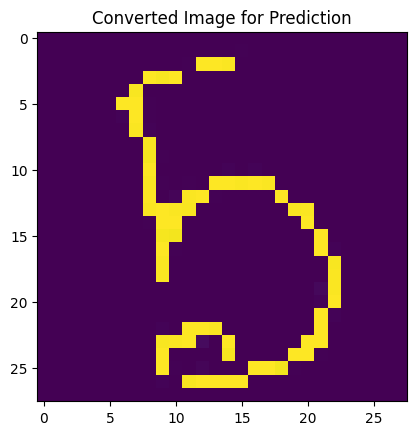

1/1 [==============================] - 0s 157ms/step
Predictions for each class [[1.1270337e-05 3.8695171e-07 7.5945928e-07 5.4410135e-05 4.9636424e-07
  9.9940991e-01 4.3964243e-04 7.9342084e-07 4.3118911e-05 3.9226867e-05]]
Predicted value is 5


In [27]:
# Specify Image path
predict('imagepath',model=model,con_dest='imagepath')